# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  








### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [24]:

import logging
from datetime import datetime, timedelta
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

##  Initialisation

In [25]:
# init logging
logging.basicConfig(level=logging.INFO)

In [26]:
# Delete all CSV files in the data directory
data_path = "./data/"
files = glob.glob(os.path.join(data_path, "*.csv"))
for f in files:
    print(f"Deleting file: {f}")
    os.remove(f)

Deleting file: ./data\20251027_194751.csv


## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

## Problem 1: Requirements ##

### Extract ###

1.  Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2.  For 5 complete previous days trading , we need to take into account that NASDAQ trades from Monday to Friday. If we go back 7 days we will always ignore weekends
3.  File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4.  Grain - Hour

Column
Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
Open - open price
Close - close price
High - High pricr
Low - Low price
Volumn - Volume in period

The data frame return has an index on the date , and is a multilevel index. Level one is the ticket , and the second level is the metric - that is open , close , high , low prices and volume 
 

Todo:

1. Take Into account non-trading days as well as weekends - considered over engineering
1. Add a time column with EST instead of UCT.

In [27]:
# prototype for extracting stock data
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/"):
    """
    Function to get stock data from yfinance

    Parameters:
    tickers (list): List of stock tickers to download data for
    start_date (str): Start date for data in format "YYYY-MM-DD". If None, defaults to 6 days ago.
    end_date (str): End date for data in format "YYYY-MM-DD". If None, defaults to yesterday.
    interval (str): Data interval. Default is "1h".
    data_path (str): Path to save the data. Default is "./data/".
    Returns:
    df_data (DataFrame): DataFrame containing the stock data
    file_name (str): Name of the file where data is saved
    """
    ## TODO: start with the end date , and then go back 5 trading days to get the start date , if start_date is None
    # is not configured
    if start_date is None:
        # Variation of the fence posting to get last 7 days of data
        start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")
        # create file name based on current date and time
        file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    else:
        # convert start_date to datetime object
        start_date_time = datetime.strptime(start_date, "%Y-%m-%d")
        # create file name based on start time and 23:59:59 of end date
        start_date_str = start_date_time.strftime("%Y%m%d") + "_235959"
        file_name = f"{data_path}{start_date_str}.csv"
    # if end_date is None , set to today - 0 days this means yesterday's data inclusive
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=0)).strftime("%Y-%m-%d")
    else: # convert end_date to datetime object
        end_date_time = datetime.strptime(end_date, "%Y-%m-%d")
        # add 1 day to end_date to make it inclusive
        end_date = (end_date_time + timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        os.makedirs(data_path)
    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        os.remove(file_name)
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return df_data
   



In [28]:
df = get_data(tickers=tickers)

INFO:root:Start Date: 2025-10-20, End Date: 2025-10-27
C:\Users\cw171001\AppData\Local\Temp\ipykernel_4176\558690274.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[                       0%                       ]C:\Users\cw171001\AppData\Local\Temp\ipykernel_4176\558690274.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed



## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

Requirements

1. Glob the data folder for YYYYMMDD_hhmmss.csv files. 
    1. We will glob the files looking for the pattern 20*.*csv
    1.

References

https://docs.python.org/3/library/glob.html


Clear Down Data before test

In [29]:
def get_the_latest_file(data_path="./data/"):
    """get_the_latest_file

    Args:
        data_path (str): The path to the directory containing the data files.

    Returns:
        str: The path to the latest data file, or None if no files are found.
    """

    logging.info(f"Getting the latest file from {data_path}")
    # File pattern
    file_pattern = "20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv"
    # Add path to file pattern
    file_pattern = os.path.join(data_path, file_pattern)
    list_of_files = glob.glob(file_pattern) 
    if not list_of_files:
        logging.warning(f"No files found in {data_path} matching pattern {file_pattern}")
        return None
    latest_file = max(list_of_files, key=os.path.getctime)
    logging.info(f"Latest file: {latest_file}")
    return latest_file

### Load data from 

In [30]:
file = get_the_latest_file()
print(file)


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251027_195245.csv
INFO:root:Latest file: ./data\20251027_195245.csv


./data\20251027_195245.csv


In [31]:
def load_file_into_dataframe(file):
    """load_file_into_dataframe

    Args:
        file (str): The path to the data file.

    Returns:
        pd.DataFrame: The data as a pandas DataFrame.
    """
    if file is None:
        logging.error("No file provided to load into dataframe.")
        return None
    df = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=True)
    return df



In [32]:
print("Loading data from the latest file...")
file = get_the_latest_file()
full_file_name = os.path.abspath(file)
print(f"Loading data from file: {full_file_name}")

df = load_file_into_dataframe(file)
print("File Loaded Successfully")
print(df.shape)

INFO:root:Getting the latest file from ./data/


Loading data from the latest file...


INFO:root:Latest file: ./data\20251027_195245.csv


Loading data from file: c:\Users\cw171001\OneDrive - Teradata\Documents\GitHub\PFDA_computer_architecture\data\20251027_195245.csv
File Loaded Successfully
(35, 25)


### Investigate Data Frame

Have a look at the dataframe and see it's structure. 

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

The index is DatetimeIndex - that is the timestamp of the price.
The data appears Company/Ticker - and then metrics - open,high,low,close,volume



In [33]:
# Have a look at the index and columns
print(" Data Frame Info")
print(df.info(verbose=True))
#print(df.columns)

 Data Frame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-10-20 13:30:00+00:00 to 2025-10-24 19:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (AMZN, Open)    35 non-null     float64
 1   (AMZN, High)    35 non-null     float64
 2   (AMZN, Low)     35 non-null     float64
 3   (AMZN, Close)   35 non-null     float64
 4   (AMZN, Volume)  35 non-null     int64  
 5   (AAPL, Open)    35 non-null     float64
 6   (AAPL, High)    35 non-null     float64
 7   (AAPL, Low)     35 non-null     float64
 8   (AAPL, Close)   35 non-null     float64
 9   (AAPL, Volume)  35 non-null     int64  
 10  (GOOG, Open)    35 non-null     float64
 11  (GOOG, High)    35 non-null     float64
 12  (GOOG, Low)     35 non-null     float64
 13  (GOOG, Close)   35 non-null     float64
 14  (GOOG, Volume)  35 non-null     int64  
 15  (NFLX, Open)    35 non-null     float64
 16  (NFLX, High)   

Check the first and last dates . To check if the week is being covered.
That is the fense post problem

In [34]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
#print("Datetime Index:")
#print(datetime_index.tolist())
# Convert series datetime to dates and remove duplicates and sort
date_list = datetime_index.dt.date.drop_duplicates().sort_values().astype(str)
print(date_list)

0     2025-10-20
7     2025-10-21
14    2025-10-22
21    2025-10-23
28    2025-10-24
Name: Datetime, dtype: object


Investigate the time zones , the data is from US NASDAQ - Monday to Friday 9:30 to 21:30 EST , UTC+8

https://www.ig.com/en/trading-strategies/nasdaq-opening-and-closing-times--when-can-you-trade--230527#:~:text=The%20index%20opens%20at%209.30,that's%204%20am%20UTC%2B8.&text=However%2C%20you%20can%20trade%20the,a%20day%2C%20Monday%20to%20Thursday.

In [35]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
# Extract the time zone info
time_zone = datetime_index.dt.tz
print(f"Time Zone Info: {time_zone}")
# Extract time from datetime index
time_list = datetime_index.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List:")
print(time_list)
# see if the convert the timezone to EST for NASDAQ data is possible
datetime_index_est = datetime_index.dt.tz_convert('US/Eastern')
print("Datetime Index in EST:")
time_list_est = datetime_index_est.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List in EST:")
print(time_list_est)

Time Zone Info: UTC
Time List:
0    13:30:00
1    14:30:00
2    15:30:00
3    16:30:00
4    17:30:00
5    18:30:00
6    19:30:00
Name: Datetime, dtype: object
Datetime Index in EST:
Time List in EST:
0    09:30:00
1    10:30:00
2    11:30:00
3    12:30:00
4    13:30:00
5    14:30:00
6    15:30:00
Name: Datetime, dtype: object


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251027_195245.csv
INFO:root:Loading data from file: ./data\20251027_195245.csv
INFO:root:Latest file: ./data\20251027_195245.csv
INFO:root:Loading data from file: ./data\20251027_195245.csv


The latest file name is: ./data\20251027_195245.csv
Filename only: 20251027_195245.csv
Filename without extension: 20251027_195245
PNG Filename: 20251027_195245.png
PNG File Path: ./data/20251027_195245.png
0    2025-10-20 13:30:00+00:00
1    2025-10-20 14:30:00+00:00
2    2025-10-20 15:30:00+00:00
3    2025-10-20 16:30:00+00:00
4    2025-10-20 17:30:00+00:00
5    2025-10-20 18:30:00+00:00
6    2025-10-20 19:30:00+00:00
7    2025-10-21 13:30:00+00:00
8    2025-10-21 14:30:00+00:00
9    2025-10-21 15:30:00+00:00
10   2025-10-21 16:30:00+00:00
11   2025-10-21 17:30:00+00:00
12   2025-10-21 18:30:00+00:00
13   2025-10-21 19:30:00+00:00
14   2025-10-22 13:30:00+00:00
15   2025-10-22 14:30:00+00:00
16   2025-10-22 15:30:00+00:00
17   2025-10-22 16:30:00+00:00
18   2025-10-22 17:30:00+00:00
19   2025-10-22 18:30:00+00:00
20   2025-10-22 19:30:00+00:00
21   2025-10-23 13:30:00+00:00
22   2025-10-23 14:30:00+00:00
23   2025-10-23 15:30:00+00:00
24   2025-10-23 16:30:00+00:00
25   2025-10-23 17

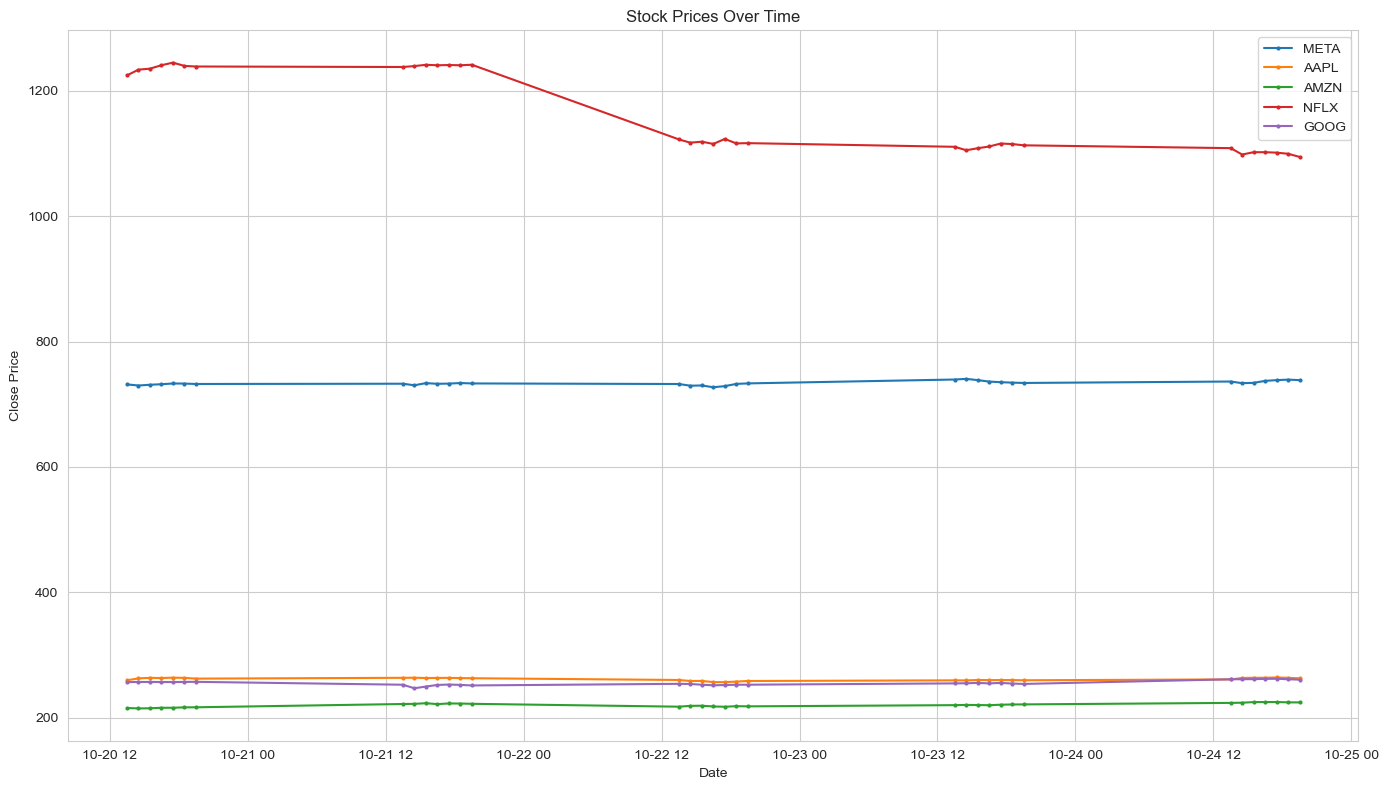

<Figure size 640x480 with 0 Axes>

In [36]:
### Attempt to do plot and write to file

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
data_path = "./data/"

# create full path for png file
png_file_path = os.path.join(data_path, filename_png)
print("PNG File Path:", png_file_path)
# Best practice: create a figure and an axis object
fig, ax = plt.subplots(figsize=(14, 8))
df.reset_index(inplace=True)
print(df['Datetime'])
#print("X Timestamps:", df['Date'])
for ticker in tickers:
    # display df.index on x-axis in date format
    # don't display dates with no data points
    ax.plot(df['Datetime'], df[(ticker, 'Close')], label=ticker, marker='o', markersize=2, scalex=True)
ax.set_xlabel('Date')
#ax.set_xticks(rotation=45)
ax.set_ylabel('Close Price')
ax.set_title('Stock Prices Over Time')
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig(png_file_path)

In [37]:
def plot_data(df, png_file_path):
    """plot_data

    Args:
        df (pd.DataFrame): The data as a pandas DataFrame.
        png_file_path (str): The path to save the plot image.

    Returns:
        None
    """
    if df is None or png_file_path is None:
        logging.error("DataFrame or PNG file path is None.")
        return
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.savefig(png_file_path)
    logging.info(f"Plot saved to {png_file_path}")

INFO:root:Plot saved to ./data/20251027_195245.png


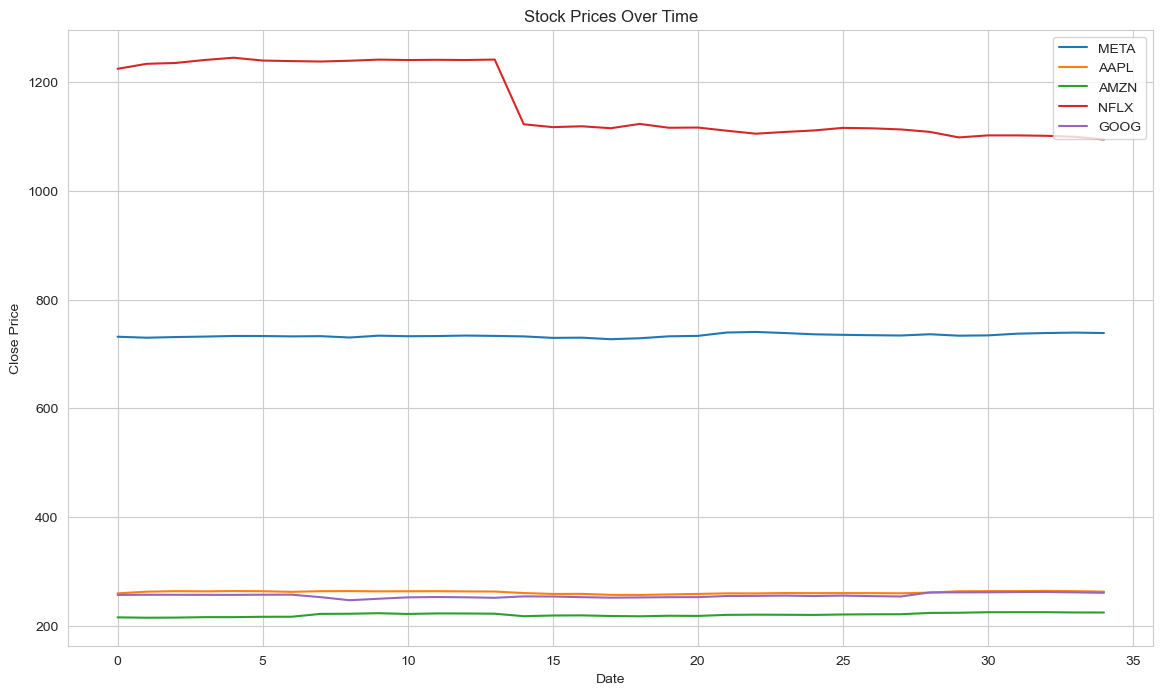

In [38]:
plot_data(df, png_file_path)
#------------------------------------------------------------------------------


Try alternatives to plotting data 


In [39]:

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
df

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251027_195245.csv
INFO:root:Loading data from file: ./data\20251027_195245.csv
INFO:root:Latest file: ./data\20251027_195245.csv
INFO:root:Loading data from file: ./data\20251027_195245.csv


The latest file name is: ./data\20251027_195245.csv
Filename only: 20251027_195245.csv
Filename without extension: 20251027_195245
PNG Filename: 20251027_195245.png


Ticker                           AMZN                                      \
Price                            Open        High         Low       Close   
Datetime                                                                    
2025-10-20 13:30:00+00:00  213.800003  215.369995  213.589996  215.330002   
2025-10-20 14:30:00+00:00  215.339996  215.660004  214.559998  214.649994   
2025-10-20 15:30:00+00:00  214.654999  215.190994  214.490005  214.880005   
2025-10-20 16:30:00+00:00  214.869995  216.050003  214.679993  215.710007   
2025-10-20 17:30:00+00:00  215.681107  216.149994  215.529999  215.720001   
2025-10-20 18:30:00+00:00  215.720001  216.608002  215.660004  216.354996   
2025-10-20 19:30:00+00:00  216.360001  216.649994  216.229996  216.470001   
2025-10-21 13:30:00+00:00  218.404999  222.239899  218.000000  221.720001   
2025-10-21 14:30:00+00:00  221.699997  222.369995  220.770004  221.970001   
2025-10-21 15:30:00+00:00  221.960007  223.149994  221.520004  222.975006   
2025-10-21 16:30:00+00:00  222.970001  223.320007  221.154999  221.544998   
2025-10-21 17:30:00+00:00  221.544998  222.664993  221.520004  222.584305   
2025-10-21 18:30:00+00:00  222.589996  223.149902  222.240097  222.460007   
2025-10-21 19:30:00+00:00  222.460007  222.491302  221.949997  222.029999   
2025-10-22 13:30:00+00:00  219.429993  220.005005  217.330002  217.449997   
2025-10-22 14:30:00+00:00  217.438004  218.960007  216.910004  218.739899   
2025-10-22 15:30:00+00:00  218.740005  219.759995  218.380005  218.970001   
2025-10-22 16:30:00+00:00  218.960007  219.059998  217.479996  217.800003   
2025-10-22 17:30:00+00:00  217.785004  217.809998  216.520004  217.304993   
2025-10-22 18:30:00+00:00  217.304993  218.330002  217.009995  218.270004   
2025-10-22 19:30:00+00:00  218.289993  218.380005  217.541000  217.970001   
2025-10-23 13:30:00+00:00  218.945007  220.809998  218.179993  219.885605   
2025-10-23 14:30:00+00:00  219.910004  220.649994  219.750000  220.271393   
2025-10-23 15:30:00+00:00  220.264999  220.360001  219.391403  220.070007   
2025-10-23 16:30:00+00:00  220.059998  220.683807  219.750000  219.774994   
2025-10-23 17:30:00+00:00  219.760101  220.719803  219.699997  220.600006   
2025-10-23 18:30:00+00:00  220.589996  221.219803  220.250000  220.964996   
2025-10-23 19:30:00+00:00  220.970001  221.300003  220.669998  221.089996   
2025-10-24 13:30:00+00:00  221.970001  224.639999  221.899994  223.479996   
2025-10-24 14:30:00+00:00  223.470001  224.070007  222.870407  223.789993   
2025-10-24 15:30:00+00:00  223.800003  224.838806  223.470001  224.765198   
2025-10-24 16:30:00+00:00  224.750000  225.259995  224.500000  224.839996   
2025-10-24 17:30:00+00:00  224.839996  225.399994  224.634995  224.850006   
2025-10-24 18:30:00+00:00  224.854996  224.929993  224.080002  224.335007   
2025-10-24 19:30:00+00:00  224.330002  224.669998  224.089996  224.259995   

Ticker                                     AAPL                          \
Price                        Volume        Open        High         Low   
Datetime                                                                  
2025-10-20 13:30:00+00:00   8658353  255.884995  259.869995  255.630005   
2025-10-20 14:30:00+00:00   4483248  259.489990  263.549988  259.070007   
2025-10-20 15:30:00+00:00   2935631  262.549988  264.375000  262.417511   
2025-10-20 16:30:00+00:00   2596339  263.480011  264.209991  262.649994   
2025-10-20 17:30:00+00:00   2303812  263.179993  263.829987  262.790009   
2025-10-20 18:30:00+00:00   3054110  263.739990  263.809998  263.040009   
2025-10-20 19:30:00+00:00   3035312  263.440002  263.850006  261.929993   
2025-10-21 13:30:00+00:00  14973073  261.880005  265.290009  261.880005   
2025-10-21 14:30:00+00:00   6236489  263.459991  263.829987  262.510010   
2025-10-21 15:30:00+00:00   5438723  263.670013  264.535004  263.080109   
2025-10-21 16:30:00+00:00   5352732  263.160004  263.679901  262.847504   
2025-10-21 17:30:00+00:

PNG File Path: ./data/20251027_195245.png


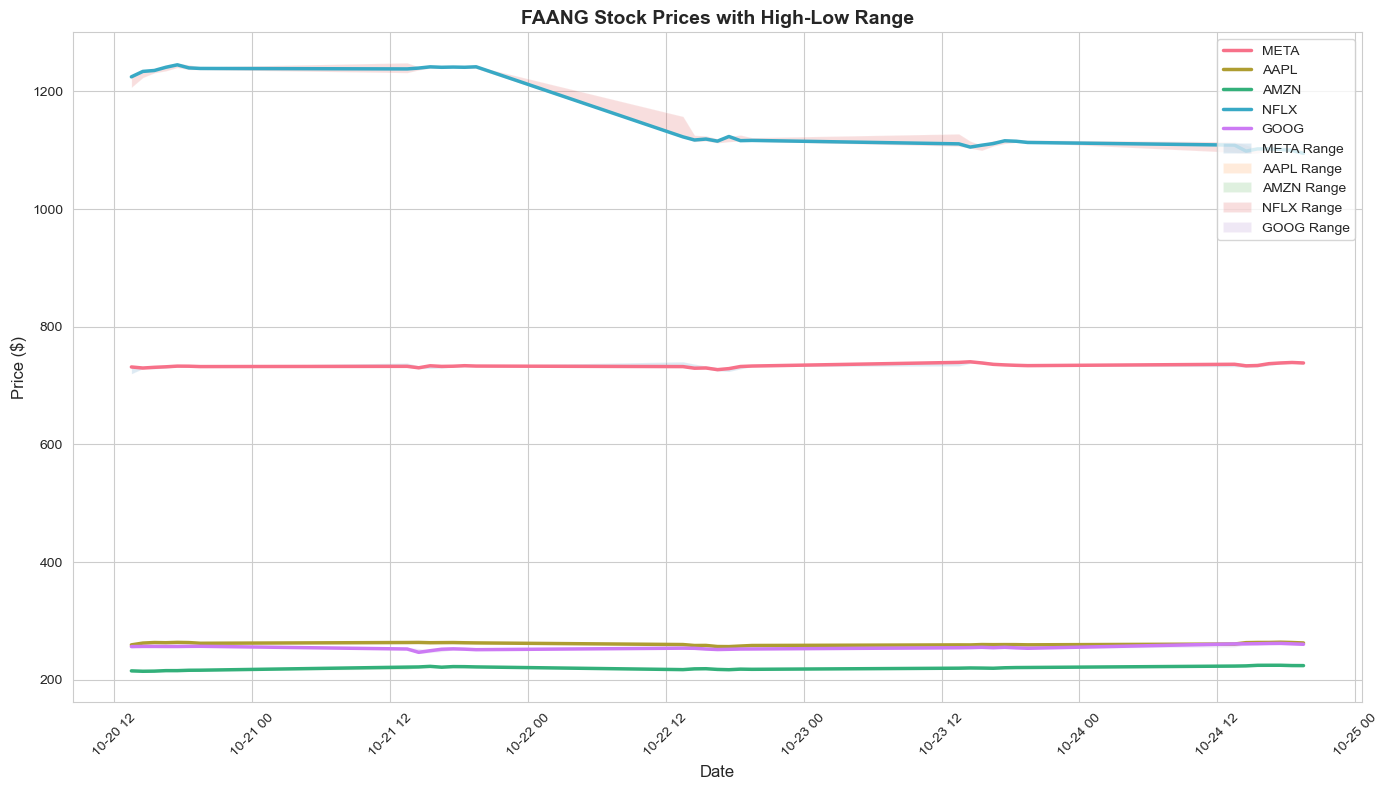

In [40]:
print("PNG File Path:", png_file_path)

# Prepare data for seaborn plotting - reshape for long format
plot_data = []
for ticker in tickers:
    ticker_data = pd.DataFrame({
        'Date': df.index,
        'Close': df[(ticker, 'Close')].values,
        'High': df[(ticker, 'High')].values,
        'Low': df[(ticker, 'Low')].values,
        'Ticker': ticker
    })
    plot_data.append(ticker_data)

# Combine all ticker data
combined_data = pd.concat(plot_data, ignore_index=True)

# Create seaborn plot with proper styling
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot close prices using seaborn
sns.lineplot(data=combined_data, x='Date', y='Close', hue='Ticker', 
             palette='husl', linewidth=2.5)

# Add shaded areas for high-low ranges
for ticker in tickers:
    ticker_subset = combined_data[combined_data['Ticker'] == ticker]
    plt.fill_between(ticker_subset['Date'], 
                     ticker_subset['High'], 
                     ticker_subset['Low'], 
                     alpha=0.15, 
                     label=f'{ticker} Range')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('FAANG Stock Prices with High-Low Range', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig(png_file_path, dpi=300, bbox_inches='tight')

In [41]:
# Data is already in the right format - combined_data has Date, Close, High, Low, Ticker
# Now normalize the price data to 0-1 range for each ticker individually
normalized_data = combined_data.copy()

# Normalize each ticker separately
for ticker in tickers:
    ticker_mask = normalized_data['Ticker'] == ticker
    for column in ['Close', 'High', 'Low']:
        ticker_values = normalized_data.loc[ticker_mask, column]
        min_val = ticker_values.min()
        max_val = ticker_values.max()
        normalized_data.loc[ticker_mask, column] = (ticker_values - min_val) / (max_val - min_val)

print("Normalized data (first 10 rows):")
print(normalized_data.head(10))

Normalized data (first 10 rows):
                       Date     Close      High       Low Ticker
0 2025-10-20 13:30:00+00:00  0.341062  0.233562  0.000000   META
1 2025-10-20 14:30:00+00:00  0.206433  0.241119  0.476795   META
2 2025-10-20 15:30:00+00:00  0.296187  0.191142  0.459668   META
3 2025-10-20 16:30:00+00:00  0.361258  0.254724  0.533149   META
4 2025-10-20 17:30:00+00:00  0.447273  0.331057  0.647514   META
5 2025-10-20 18:30:00+00:00  0.437550  0.346941  0.616022   META
6 2025-10-20 19:30:00+00:00  0.390429  0.294409  0.626520   META
7 2025-10-21 13:30:00+00:00  0.420718  0.704461  0.613260   META
8 2025-10-21 14:30:00+00:00  0.234864  0.349206  0.476242   META
9 2025-10-21 15:30:00+00:00  0.491025  0.401361  0.499944   META


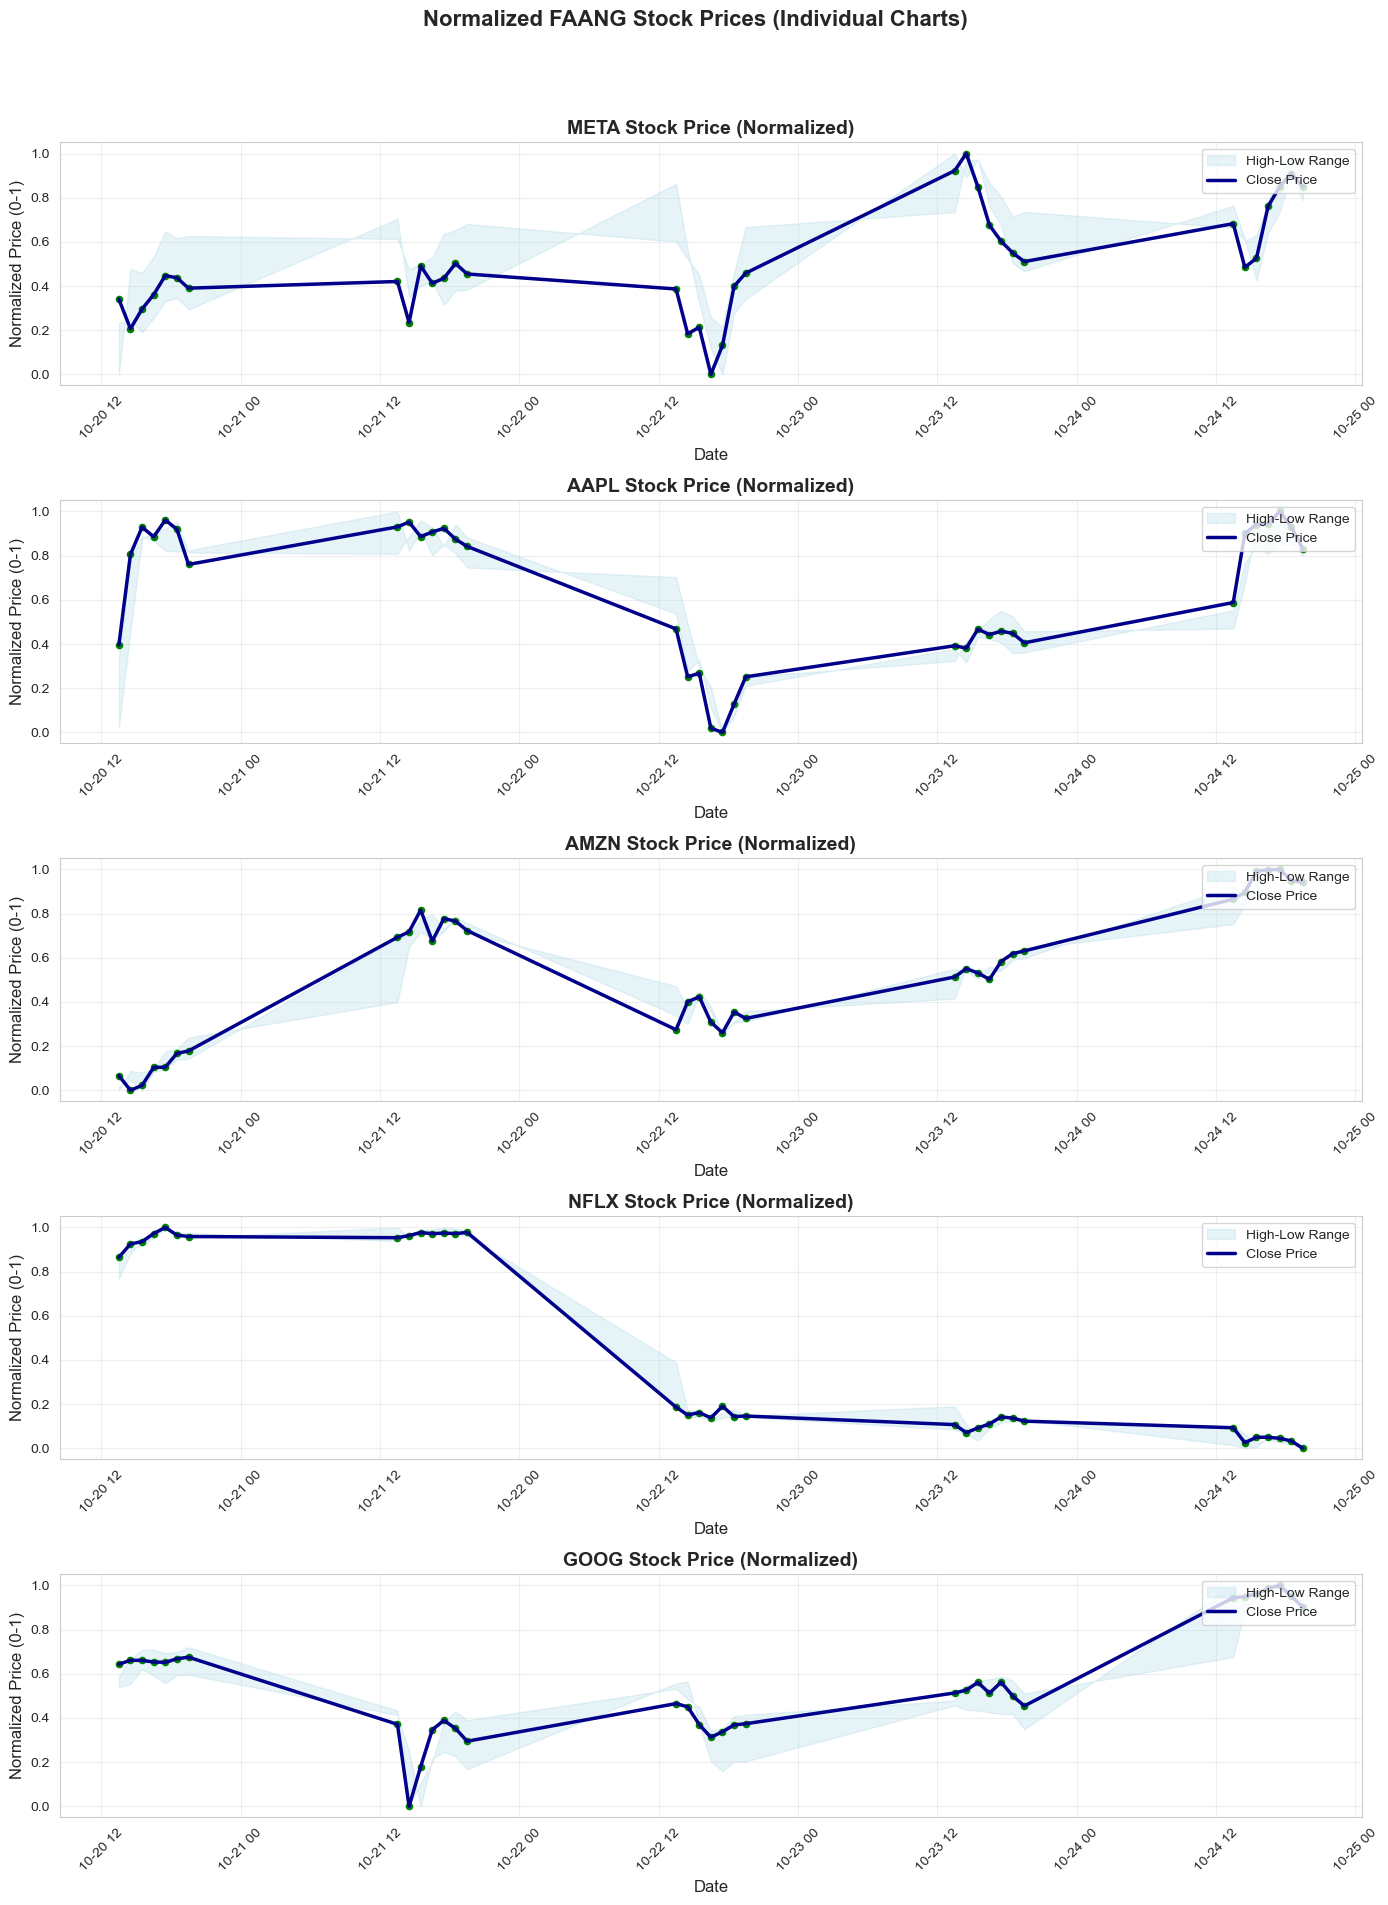

Normalized individual plots saved to: ./data/20251027_195245_normalized_individual.png


<Figure size 640x480 with 0 Axes>

In [42]:
# Create separate plots for each ticker using normalized data
# Note: This was all done using vibe coding using vscode and github copilot
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 4 * len(tickers)))
fig.suptitle('Normalized FAANG Stock Prices (Individual Charts)', fontsize=16, fontweight='bold', y=0.98)

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = normalized_data[normalized_data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    ax = axes[i]
    
    # Plot shaded area between high and low
    ax.fill_between(ticker_data['Date'], 
                   ticker_data['High'], 
                   ticker_data['Low'], 
                   alpha=0.3, 
                   color='lightblue',
                   label='High-Low Range')
    
    # Plot close price line
    sns.lineplot(data=ticker_data, x='Date', y='Close', 
                ax=ax, color='darkblue', linewidth=2.5, label='Close Price')
    # Mark each data point with a small circle
    ax.scatter(ticker_data['Date'], ticker_data['Close'], color='green', s=20)
    
    ax.set_title(f'{ticker} Stock Price (Normalized)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Normalized Price (0-1)', fontsize=12)
    ax.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
normalized_png_path = png_file_path.replace('.png', '_normalized_individual.png')
plt.savefig(normalized_png_path, dpi=300, bbox_inches='tight')
print(f"Normalized individual plots saved to: {normalized_png_path}")

__Gemini Prompt__

How do I plot a time series in such a way that that so missing time is not included and the gap between each time series is consistent

The recommendation is too plot against the index , and not the time

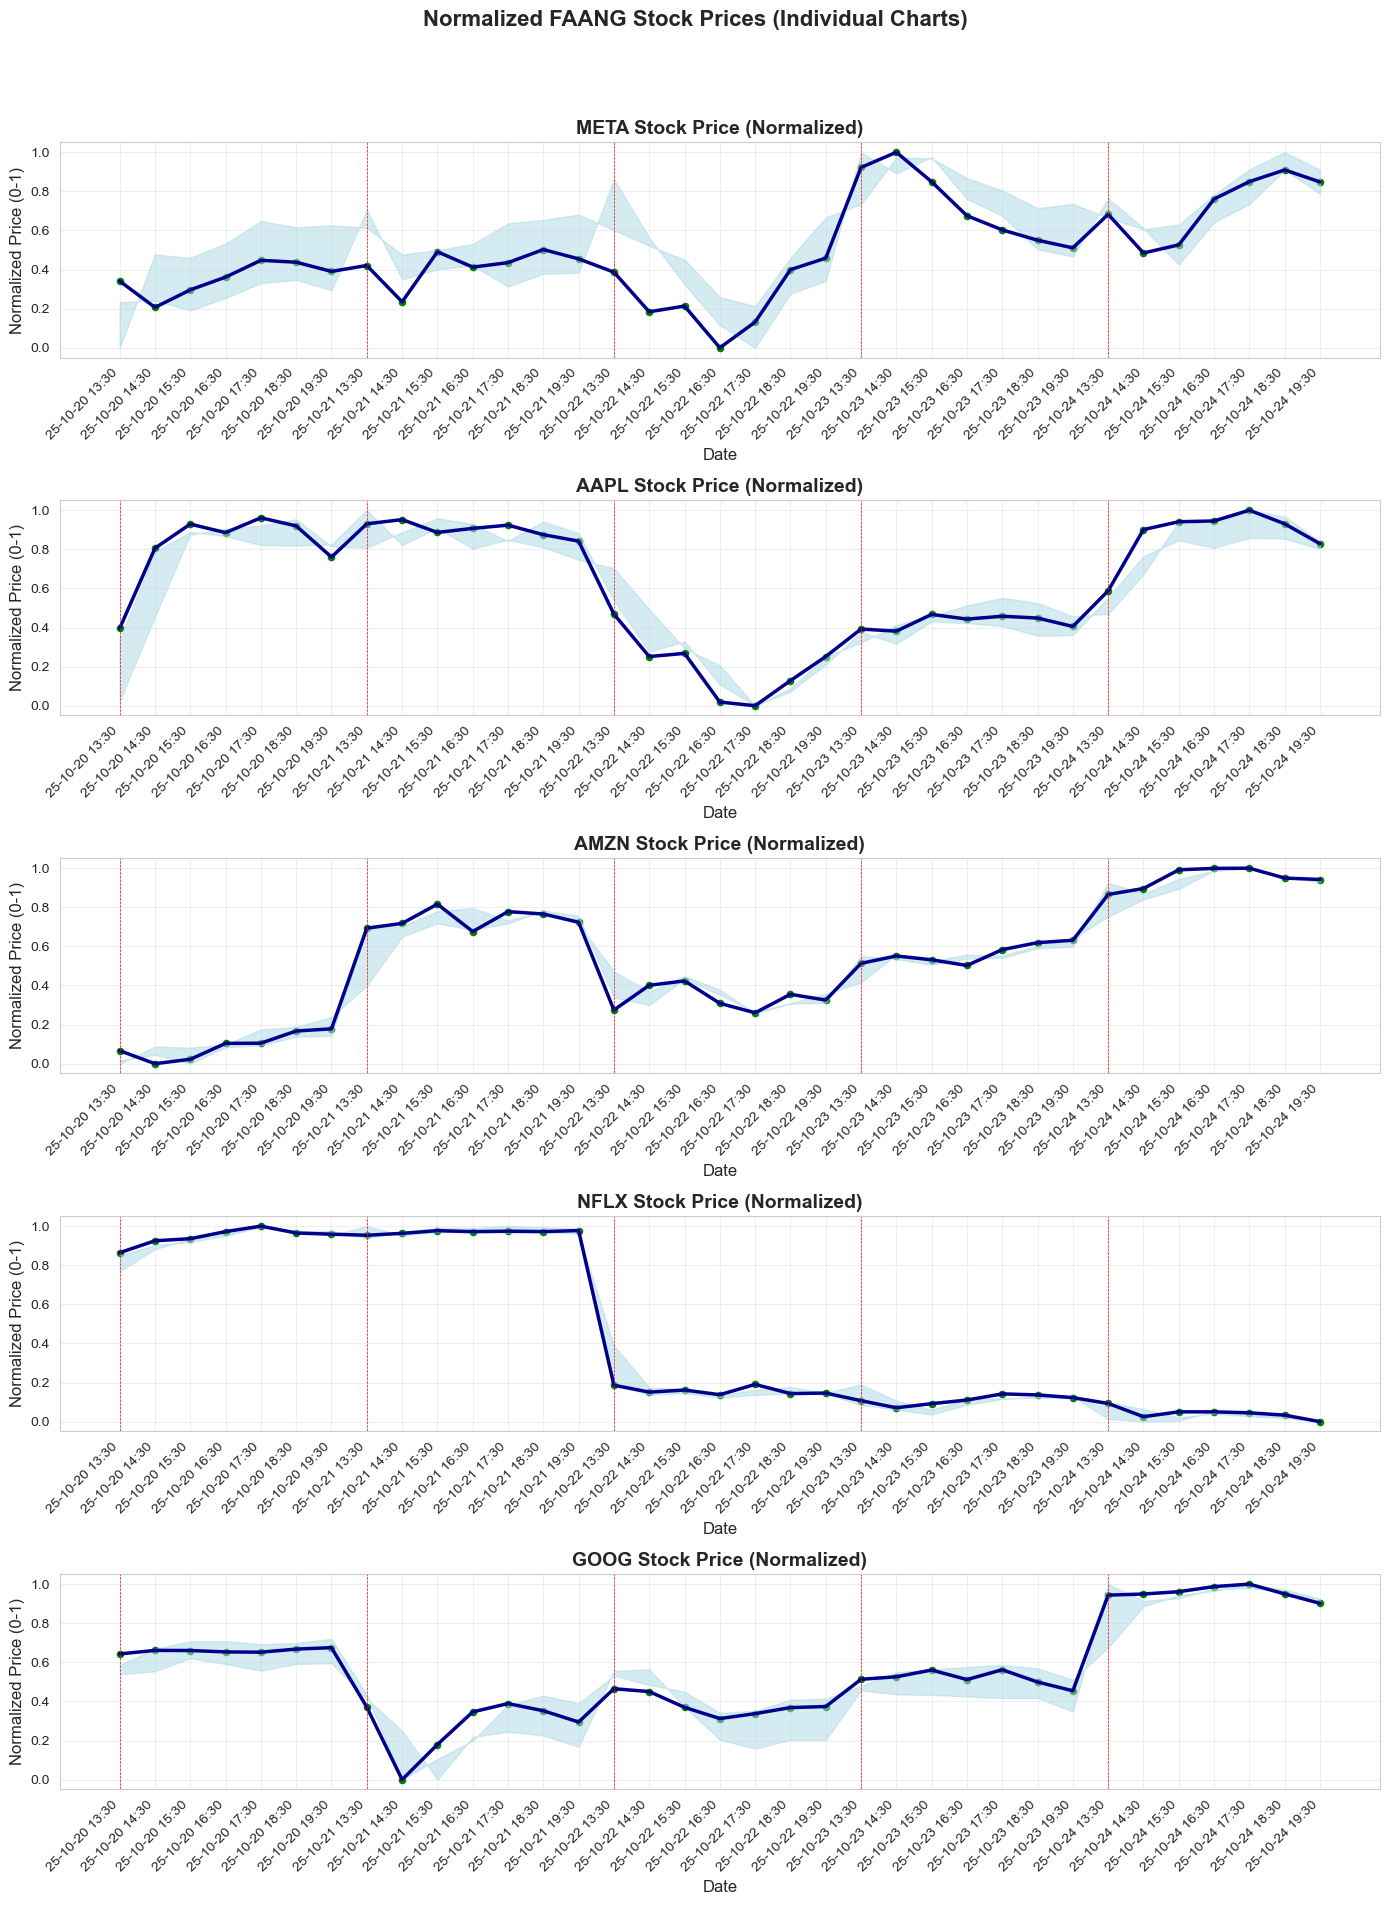

Normalized individual plots saved to: ./data/20251027_195245_normalized_individual.png


,Date,Close,High,Low,Ticker,date_ind
Date_Index,,,,,,
1.0,2025-10-20 13:30:00+00:00,0.341062,0.233562,0.000000,META,NaN
2.0,2025-10-20 14:30:00+00:00,0.206433,0.241119,0.476795,META,0.0
3.0,2025-10-20 15:30:00+00:00,0.296187,0.191142,0.459668,META,0.0
4.0,2025-10-20 16:30:00+00:00,0.361258,0.254724,0.533149,META,0.0
5.0,2025-10-20 17:30:00+00:00,0.447273,0.331057,0.647514,META,0.0
...,...,...,...,...,...,...
31.0,2025-10-24 15:30:00+00:00,0.961361,0.928104,0.944066,GOOG,0.0
32.0,2025-10-24 16:30:00+00:00,0.987450,0.976307,0.965966,GOOG,0.0
33.0,2025-10-24 17:30:00+00:00,1.000000,0.978757,1.000000,GOOG,0.0


<Figure size 640x480 with 0 Axes>

In [ ]:
# Create separate plots for each ticker using normalized data
# Note: This was all done using vibe coding using vscode and github copilot
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 4 * len(tickers)))
fig.suptitle('Normalized FAANG Stock Prices (Individual Charts)', fontsize=16, fontweight='bold', y=0.98)

# add a new column to behave as a index on the time series
normalized_data['Date_Index'] = normalized_data['Date'].rank(method='dense')
# This will set indicator to 1 for the start of each new day
normalized_data['date_ind'] = normalized_data['Date'].dt.date.rank(method='dense').diff(1)
# set Date_Index as index
normalized_data.set_index('Date_Index', inplace=True)

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = normalized_data[normalized_data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date_Index')
    
    ax = axes[i]
    ax.plot(ticker_data.index, ticker_data['Close'], color='darkblue', linewidth=2.5, label='Close Price')

    ax.scatter(ticker_data.index, ticker_data['Close'], color='green', s=20, label='Close Price')
    # Plot shaded area between high and low
    ax.fill_between(ticker_data.index, ticker_data['Low'], ticker_data['High'], color='lightblue', alpha=0.5)
    ax.set_title(f'{ticker} Stock Price (Normalized)', fontsize=14, fontweight='bold')
    # Add vertical lines for each day
    for x in ticker_data.index:
        # get date_ind for x
        date_ind = ticker_data['date_ind'].loc[x]
        # if start of new day , draw vertical line
        if pd.notna(date_ind) and date_ind != 0:
            ax.axvline(x=x, color='red', linestyle='--', linewidth=0.5)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Normalized Price (0-1)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(ticker_data.index)
    # draw a line per start of each day
    ax.set_xticklabels(ticker_data['Date'].dt.strftime('%y-%m-%d %H:%M'), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
normalized_png_path = png_file_path.replace('.png', '_normalized_individual.png')
plt.savefig(normalized_png_path, dpi=300, bbox_inches='tight')
print(f"Normalized individual plots saved to: {normalized_png_path}")
normalized_data